In [262]:
# 读取数据
fn = 'test1.txt'
fn = 'input.txt'

data = []
with open(fn) as f:
    for line in f:
        data.append(list(line.strip()))

H = len(data)
W = len(data[0])
print(H, W)

141 141


2.74822695035461


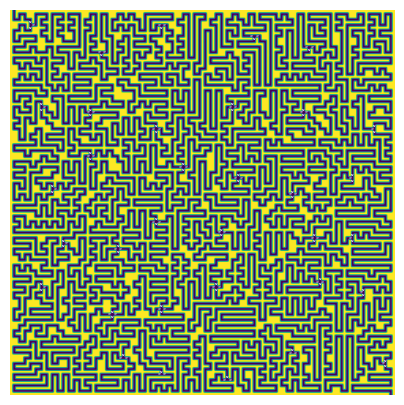

In [271]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

tmp = np.array([[ele=="#" for ele in row] for row in data])
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(tmp)
ax.set_axis_off()

bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
width *= fig.dpi  # in pixels
height *= fig.dpi # in pixels
wrange = ax.get_xlim()[1] - ax.get_xlim()[0]
hrange = ax.get_ylim()[1] - ax.get_ylim()[0]
fs = width / wrange  # 每个 data unit 的 pixels
print(fs)

for i, row in enumerate(data):
    for j, ele in enumerate(row):
        if ele not in "#.":
            ax.text(j, i, ele, color='w', weight='bold', fontsize=fs,
                    horizontalalignment='center', verticalalignment='center')
plt.show()

In [264]:
start_pos = (0, 1)
stop_pos  = (H-1, W-2)
print(start_pos, stop_pos)

(0, 1) (140, 139)


In [265]:
# 周围可以通行的格子
def get_nbs(pos):
    i, j = pos
    nbs = [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
    nbs = [(x,y) for x,y in nbs if 0<=x<H and 0<=y<W and data[x][y] != "#"]
    return nbs

In [266]:
# 似乎是一个 tree (no cycles)
# 找到所有的路口 (单向路口)
cross = set()
for i, row in enumerate(data):
    for j, ele in enumerate(row):
        if ele == ".":
            nbs = get_nbs((i,j))
            combined = "".join([data[x][y] for x, y in nbs])
            if "." not in combined and (">" in combined and "v" in combined):
                cross.add((i,j))
print(len(cross))

34


In [267]:
# print(cross)

In [268]:
# 以上这些节点, 加上初始和结束节点, 可以构成一个有向无环图
# 首先寻找与 start_pos 和 stop_pos 相联的节点 (这里 tricky, 需要看 input), 然后构建这个图
# 注意到: 每个节点至多与两个节点相连
# 搜索下一个与之相连的节点是什么

def search_next(node):
    # assert node in cross, "应该选取一个节点开始"
    next_nodes = []     # 记录下一个与之相连的节点是什么
    next_routes = []    # 记录到下一个节点的路程
    nbs = get_nbs(node) # 当前节点邻居
    nbs = [(x,y) for x, y in nbs if x > node[0] or y > node[1]]  # 不能反向
    assert len(nbs)<=2, "至多有两个方向"
    for nb in nbs:    # 节点的 nbs, 应该只有两个方向
        visited = []
        pos = nb
        visited.append(node)
        visited.append(pos)
        while pos not in cross and pos != stop_pos:
            nnbs = get_nbs(pos)
            nnbs = [nb for nb in nnbs if nb not in visited]
            assert len(nnbs) == 1, "应该只有一个方向"
            pos = nnbs[0]
            visited.append(pos)
        next_nodes.append(pos)
        next_routes.append(visited)
    return next_nodes, next_routes

graph = dict()
for node in [start_pos] + list(cross):
    next_nodes, next_routes = search_next(node)
    graph[node] = list(zip(next_nodes, [len(route)-1 for route in next_routes]))

In [ ]:
# A recursive function used by longestPath. See below
# link for details
# https:#www.geeksforgeeks.org/topological-sorting/
def topologicalSortUtil(pos):
    global Stack, visited, adj
    visited[pos] = True
    # Recur for all the vertices adjacent to this vertex
    # list<AdjListNode>::iterator i
    for next_pos, d in adj[pos]:
        if (not visited[next_pos]):
            topologicalSortUtil(next_pos)
    # Push current vertex to stack which stores topological
    # sort
    Stack.append(pos)

# The function to find longest distances from a given vertex.
# It uses recursive topologicalSortUtil() to get topological
# sorting.
def longestPath(s):
    global Stack, visited, adj, V
    dist = {pos:-10**9 for pos in V}

    # Call the recursive helper function to store Topological
    # Sort starting from all vertices one by one
    for pos in V:
        if (visited[pos] == False):
            topologicalSortUtil(pos)
    # print(Stack)

    # Initialize distances to all vertices as infinite and
    # distance to source as 0
    dist[s] = 0
    # Stack.append(1)

    # Process vertices in topological order
    while (len(Stack) > 0):
    
        # Get the next vertex from topological order
        u = Stack[-1]
        del Stack[-1]
        #print(u)

        # Update distances of all adjacent vertices
        # list<AdjListNode>::iterator i
        if (dist[u] != 10**9):
            for next_pos, d in adj[u]:
                # print(u, i)
                if (dist[next_pos] < dist[u] + d):
                    dist[next_pos] = dist[u] + d

    # Print calculated longest distances
    print(dist[stop_pos])
    # for i in V:
    #     print("INF ",end="") if (dist[i] == -10**9) else print(dist[i],end=" ")

# Driver code
V, Stack, visited = list(graph.keys())+[stop_pos], [], {v:False for v in graph}
visited[stop_pos] = False
adj = graph
adj[stop_pos] = []

s = start_pos
print("Following are longest distances from source vertex ",s)
longestPath(s)

# This code is contributed by mohit kumar 29.

## Part II

In [218]:
# 读取数据
fn = 'test1.txt'
fn = 'input.txt'

data = []
with open(fn) as f:
    for line in f:
        data.append(list(line.strip()))

H = len(data)
W = len(data[0])
print(H, W)

141 141


In [219]:
start_pos = (0, 1)
stop_pos  = (H-1, W-2)
print(start_pos, stop_pos)

(0, 1) (140, 139)


In [220]:
# 周围可以通行的格子
def get_nbs(pos):
    i, j = pos
    nbs = [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
    nbs = [(x,y) for x,y in nbs if 0<=x<H and 0<=y<W and data[x][y] != "#"]
    return nbs

In [221]:
# 找到所有的路口 (注意数量没变, 只是去掉了方向限制)
cross = set()
for i, row in enumerate(data):
    for j, ele in enumerate(row):
        if ele == ".":
            nbs = get_nbs((i,j))
            if len(nbs)>2:
                cross.add((i,j))
print(len(cross))

34


In [222]:
# 继续构建 graph

def search_next(node):
    # assert node in cross, "应该选取一个节点开始"
    next_nodes = []     # 记录下一个与之相连的节点是什么
    next_routes = []    # 记录到下一个节点的路程
    nbs = get_nbs(node) # 当前节点邻居
    # nbs = [(x,y) for x, y in nbs if x > node[0] or y > node[1]]  # 不能反向
    # assert len(nbs)<=2, "至多有两个方向"
    for nb in nbs:    # 节点的 nbs
        visited = []
        pos = nb
        visited.append(node)
        visited.append(pos)
        while pos not in cross and pos != start_pos and pos != stop_pos:
            nnbs = get_nbs(pos)
            nnbs = [nb for nb in nnbs if nb not in visited]
            # print(node, pos, nnbs)
            assert len(nnbs) < 2, "应该只有一个方向或者死路"
            pos = nnbs[0]
            visited.append(pos)
        next_nodes.append(pos)
        next_routes.append(visited)
    return next_nodes, next_routes

graph = dict()
for node in [start_pos] + list(cross):
    next_nodes, next_routes = search_next(node)
    graph[node] = list(zip(next_nodes, [len(route)-1 for route in next_routes]))

In [223]:
graph[start_pos]

[((5, 7), 15)]

In [224]:
# 四个方向最大连接数是四，说明在两点之间路线没有分叉
max([len(v) for k, v in graph.items()])

4

In [226]:
for k, v in graph.items():
    for node, dist in v:
        if node == stop_pos:
            print(k, v)

(129, 137) [((103, 129), 158), ((140, 139), 57), ((125, 103), 294)]


In [153]:
# 把 pos 映射到数字
mapping = {}
for i, pos in enumerate(sorted(graph.keys())):
    mapping[pos] = i
mapping[stop_pos] = i+1

adj = {}
for k, v in graph.items():
    adj[mapping[k]] = [(mapping[node],dist) for node, dist in v ]
len(mapping), len(adj)

(36, 35)

In [240]:
adj[35] = []

In [242]:
g = {}
for i in adj:
    for j, d in adj[i]:
        if i in g:
            if [j,d] not in g[i]:
                g[i].append([j, d])
        else:
            g[i] = [[j,d]]
        if j in g:
            if [i,d] not in g[j]:
                g[j].append([i, d])
        else:
            g[j] = [[i, d]]
len(g)

36

In [245]:
# 定义图的数据结构

# 定义全局变量用于保存最长路径
max_path = []
max_distance = 0

# 定义深度优先搜索函数
def dfs(node, path, distance, visited):
    global max_path
    global max_distance

    # 到达目标节点 Z，更新最长路径
    if node == 35:
        if distance > max_distance:
            max_distance = distance
            max_path = path.copy()
        return

    # 标记当前节点为已访问
    visited.add(node)
    
    # 对当前节点的邻居进行遍历
    for neighbor, weight in g[node]:
        # 如果邻居节点未被访问过，则继续深度优先搜索
        if neighbor not in visited:
            dfs(neighbor, path + [neighbor], distance + weight, visited)

    # 取消当前节点的访问标记
    visited.remove(node)

# 调用深度优先搜索函数，从点 A 开始搜索
dfs(0, [0], 0, set())

# 输出最长路径
print("最长路径:", max_path)
print("最长距离:", max_distance)

最长路径: [0, 1, 6, 16, 22, 25, 31, 33, 28, 18, 23, 12, 13, 14, 19, 20, 17, 9, 7, 10, 8, 5, 2, 3, 4, 11, 15, 21, 27, 24, 26, 34, 30, 32, 35]
最长距离: 6226
